# Tutorial Wk 11: Image Data Processing

## Introduction
In this tutorial, we will have an overview look at image data analysis, in particular on how to extract regions of interests from a set of images. The following exercises are based on some DNA images captured by microscopes at a Medial Research Institute as part of a cancer treatment study.

## Exercise 1: Image is a matrix of number

In [1]:
%matplotlib inline
import skimage
import numpy as np;
from matplotlib import pyplot as plt
from skimage import io
import os

<class 'numpy.ndarray'> float64 (10, 10)


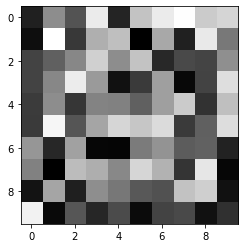

In [2]:
# A 2-D Array can be displayed as image
rand = np.random.random([10, 10])
print (type(rand), rand.dtype,  rand.shape)

plt.imshow(rand, cmap='gray');


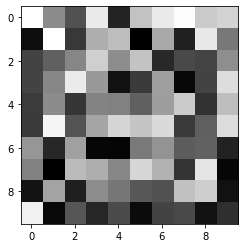

In [3]:
# Matrix (image) values can be changed manually
rand[0,0] = 1
plt.imshow(rand, cmap='gray');


# Excerise 2: Convert Images to Another Format

For the following exercises, you need to download the **images.zip** file and unpack it to a directory where the Jupyter notebook can read it (if you are working on our School's Jupyter servers, you need to upload it to the Jupyter server too).

Using the save() method, PIL can save images in most image file formats. Here’s an
example that takes all image files in a list of filenames (filelist) and converts the images
to JPEG files:

In [6]:
from PIL import Image
import os

def get_imlist(path):
# Returns a list of filenames for all tif images in a directory. 
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.tif')]


filelist = get_imlist("images/untreated/dna")
for infile in filelist:
    outfile = os.path.splitext(infile)[0] + ".jpg"
    if infile != outfile:
        try:
            #Image.open(infile).save(outfile)
            inputimage = io.imread(infile)
            io.imsave(outfile, inputimage)
        except IOError:
            print ("cannot convert", infile)
        

Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\NetMo\Anaconda3\lib\site-packages\skimage\io\_io.py:141: UserWarning: images/untreated/dna\1 (10).jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\NetMo\Anaconda3\lib\site-packages\skimage\io\_io.py:141: UserWarning: images/untreated/dna\1 (12).jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\NetMo\Anaconda3\lib\site-packages\skimage\io\_io.py:141: UserWarning: images/untreated/dna\1 (13).j

Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\NetMo\Anaconda3\lib\site-packages\skimage\io\_io.py:141: UserWarning: images/untreated/dna\1 (47).jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
Lossy conversion from 

# Excercise 3: Extracting ROI using thresholding

## Histograms

Sometimes you want to examining a specific data range, enhance the contrast in your image, or expand the contrast in a particular region while sacrificing the detail in colors that don’t vary much, or don’t matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the hist() function. Histograms can also be very useful in working out global thresholding.

<class 'numpy.ndarray'> uint16 (1024, 1024)


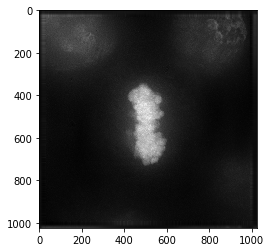

In [4]:
#Histograms
dna = io.imread("images/untreated/dna/1 (1).tif")
print (type(dna), dna.dtype,  dna.shape)

plt.imshow(dna, cmap='gray');

(array([1.7000e+01, 1.2000e+02, 3.7700e+02, 1.2650e+03, 4.2360e+03,
        1.1250e+04, 2.1278e+04, 3.6513e+04, 4.7303e+04, 4.9182e+04,
        5.1747e+04, 5.1158e+04, 4.6449e+04, 4.5563e+04, 4.0133e+04,
        3.3209e+04, 3.1493e+04, 2.8564e+04, 2.5735e+04, 2.5530e+04,
        2.4896e+04, 2.2674e+04, 2.3265e+04, 2.2238e+04, 1.9533e+04,
        1.9426e+04, 1.8343e+04, 1.5979e+04, 1.5798e+04, 1.4211e+04,
        1.2242e+04, 1.1458e+04, 1.0277e+04, 8.8070e+03, 8.7530e+03,
        8.1940e+03, 7.2890e+03, 7.5960e+03, 7.7510e+03, 7.2400e+03,
        7.6470e+03, 7.8130e+03, 7.4780e+03, 7.7890e+03, 7.7060e+03,
        7.1880e+03, 7.2010e+03, 6.5960e+03, 5.8730e+03, 5.8630e+03,
        5.3010e+03, 4.8620e+03, 4.5750e+03, 4.3550e+03, 3.7030e+03,
        3.4880e+03, 3.2610e+03, 3.0690e+03, 2.9830e+03, 2.9530e+03,
        2.6500e+03, 2.8590e+03, 2.8160e+03, 2.6960e+03, 2.8480e+03,
        2.9620e+03, 2.7700e+03, 2.8940e+03, 2.8710e+03, 2.4740e+03,
        2.5800e+03, 2.5100e+03, 2.3050e+03, 2.28

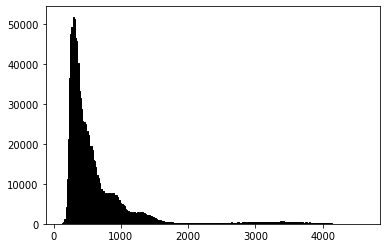

In [5]:
plt.hist(dna.ravel(), bins=256,  fc='k', ec='k')


# Thresholding
Thresholding is the simplest method of image segmentation.

In [ ]:
plt.imshow(dna, cmap='gray');

In [ ]:
dna_thresholding = 1*(dna>2500)  # change thresholding number to see the effect
plt.imshow(dna_thresholding, cmap='gray');
print(dna)

In [ ]:
# Thresholding algorithms
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(dna, figsize=(10, 8), verbose=False)
plt.show()

From above visualisation it's clear to us that Isodata, Minimum and Otsu thresholding working well to setment DNA. Lets us Otsu.

In [ ]:
from skimage.filters import threshold_otsu, threshold_local
global_thresh = threshold_otsu(dna)
dna_bw = dna > global_thresh
plt.imshow(dna_bw, cmap='gray')

In [ ]:
from skimage import morphology

dna_bw = morphology.remove_small_objects(dna_bw, 25000)

plt.imshow(dna_bw, cmap='gray')

In [ ]:
# To extract cleaned DNA
dna_clean = dna
dna_clean[~dna_bw]=0
plt.imshow(dna_clean, cmap='gray')

## Measuring the ROI (Region of Interest)
Let's do some measurements

In [ ]:
# What's the size of DNA (area), = How many pixels are white
# skimage.measure.perimeter(image, neighbourhood=4)
import skimage.measure
dna_peri = perimeter(dna_bw, neighbourhood=4)      # try neighbourhood=8, note difference in the measurement reported
print(dna_peri)

In [ ]:

dna_bw_label = skimage.measure.label(dna_bw)
dna_props = skimage.measure.regionprops(label_image=dna_bw_label, intensity_image=dna)
dna_mean_area = dna_props[0].area
dna_perimeter = dna_props[0].perimeter
dna_mean_intensity = dna_props[0].mean_intensity
print(dna_mean_area, dna_mean_intensity, dna_perimeter)


In [ ]:
# To whatelse can be extracted from dna_props
for prop in dna_props[0]:  # since we know there is only one object so the index is 0
    print(prop)

# Exercise 4: Quantifying ROI and saving to CSV
## Process all images in a folder
Put above code in a function and process all images


In [ ]:
import csv
from skimage.filters import threshold_otsu
from skimage import morphology
def processimages(infile, filename2save):
    
    dna = io.imread(infile)
    global_thresh = threshold_otsu(dna)
    dna_bw = dna > global_thresh
    dna_bw = morphology.remove_small_objects(dna_bw, 25000)
    
    dna_bw_label = skimage.measure.label(dna_bw)
    dna_props = skimage.measure.regionprops(label_image=dna_bw_label, intensity_image=dna)
    
    dna_area = dna_props[0].area
    dna_perimeter = dna_props[0].perimeter
    dna_mean_intensity = dna_props[0].mean_intensity

    with open(filename2save, "a", newline='') as csvfile: 
        writer = csv.writer(csvfile)
        writer.writerow([infile, dna_area, dna_perimeter, dna_mean_intensity])
    
   # print(dna_area, dna_mean_intensity, dna_perimeter)

# Process untreated dna images
filename2save = 'untreated_dna.csv'
with open(filename2save, "w", newline='') as csvfile: 
    writer = csv.writer(csvfile)
    writer.writerow(['fname', 'area', 'perimeter', 'mean_intensity'])

filelist = get_imlist("images/untreated/dna")
for infile in filelist:
    try:
        processimages(infile, filename2save)        
    except IOError:
        print ("An error occured: ", infile)
        
print("processing completed.")

In [ ]:
# Process treated dna images
filename2save = 'treated_dna.csv'
with open(filename2save, "w", newline='') as csvfile: 
    writer = csv.writer(csvfile)
    writer.writerow(['fname', 'area', 'perimeter', 'mean_intensity'])
    
filelist = get_imlist("images/treated/dna")
for infile in filelist:
    try:
        processimages(infile, filename2save)
    except IOError:
        print ("An error occured: ", infile)
print("processing completed.")        

In [ ]:
# print(len(filelist))

## Exploring DNA data

In [ ]:
dna_untreated_data = list(csv.DictReader(open('untreated_dna.csv')))
dna_treated_data = list(csv.DictReader(open('treated_dna.csv')))
print(dna_treated_data[0])
print(dna_untreated_data[0])

In [ ]:
len(dna_treated_data)

In [ ]:
import numpy as np
  
# dna_untreated_area = np.array(dna_untreated_area).astype(np.float)
dna_untreated_area = [row['area'] for row in dna_untreated_data]
dna_treated_area = [row['area'] for row in dna_treated_data]
dna_untreated_area = np.array(dna_untreated_area).astype(np.float)
dna_treated_area = np.array(dna_treated_area).astype(np.float)

# print(dna_untreated_area)

In [ ]:
plt.boxplot([dna_untreated_area, dna_treated_area], 
            vert=False, notch=True, flierprops={'marker':'.'})
#plt.axis([40000,44000,55000,60000])
plt.yticks([1,2], ['Untreated DNA', 'Treated DNA'])
plt.xlabel('Area')
plt.title('Untreated vs Treated Area of DNA')
plt.show()